In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import folium
from datetime import datetime
from datetime import timedelta
import arabic_reshaper
from bidi.algorithm import get_display
from dateutil import rrule
import collections
from math import sin, cos, sqrt, atan2, radians


In [ ]:
# read data
dataset = pd.read_csv('traffic_20_min.csv')
dataset

In [ ]:
pd.set_option('display.max_columns', None)
dataset = dataset.dropna(subset=['time'])

In [ ]:
# نقطه‌ای که تردد ماشین ثبت شده
class Point:
    def __init__(self, time, lat, long, code):
        self.time = time
        self.lat = lat
        self.long = long
        self.code = code
# points: نقاطی که در حین سفر توسط دوربین ثبت شده است

# plate: پلاکی که سفر برایش ثبت شده
class Travel:
    def __init__(self, plate):
        self.points = []
        self.plate = plate
        
        

در این قسمت سفرهای خودروها را محاسبه میکنیم.

In [ ]:
df = dataset.groupby(['MPN'], sort=False)\
    .apply(lambda x: x.sort_values(['time'], ascending=True)).reset_index(drop=True)


In [ ]:

FMT = '%Y-%m-%d %H:%M:%S'

num_trips = []
max_time_between_seeing = [5,10,15,20,25,30,35,40,45,50,55,60,70,80,90]
for min_duration in max_time_between_seeing:   
  travels = []
  pre_valid_index = 0
  pre_valid_plate = df.iloc[0]['MPN']     
  for index, row in df.iterrows():
      
      # check if there are more than one record of plateNo
      # if (index != 0 and row['PlateNo'] == df.iloc[index - 1]['PlateNo']) or \
      #                 (index != len(df)-1 and row['PlateNo'] == df.iloc[index + 1]['PlateNo']):
          
              t1 = row['time']
              t2 = df.iloc[pre_valid_index]['time']
              point = Point(row['time'], row['Camera_x'], row['Camera_y'], row['Camera_Code'])
              # first valid record of a plate is start of a new travel
              # first valid record of all is start of a new travel
              if len(travels)==0 or row['MPN'] != pre_valid_plate:
                  travels.append(Travel(row['MPN']))
                  travels[-1].points.append(point)

              # skip duplicate record
              elif datetime.strptime(t1, FMT) - datetime.strptime(t2, FMT) < timedelta(seconds=10) and row['Camera_Code'] == df.iloc[pre_valid_index]['Camera_Code'] :
                  pass

            
              # elif datetime.strptime(t1, FMT) - datetime.strptime(t2, FMT) < timedelta(minutes=45):
              elif datetime.strptime(t1, FMT) - datetime.strptime(t2, FMT) < timedelta(minutes=min_duration):
                  travels[-1].points.append(point)

              # seeing a record more than three hours means a new travel is started
              else:
                  travels.append(Travel(row['MPN']))
                  travels[-1].points.append(point)
              pre_valid_index = index
              pre_valid_plate = row['MPN']

  num_trips.append(len(travels))


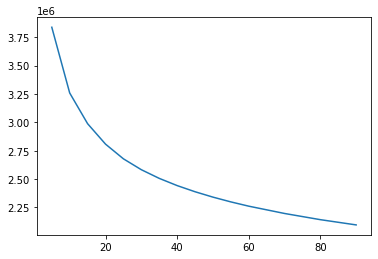

In [ ]:
plt.plot(max_time_between_seeing, num_trips)
plt.show()

In [ ]:
print(max_time_between_seeing)
print(num_trips)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80, 90]
[3837610, 3258554, 2988009, 2808109, 2678557, 2582737, 2506378, 2442819, 2388608, 2341123, 2299119, 2261413, 2197070, 2142521, 2096282]
